<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Data Science Foundation - Assignement on Facebook Data
## Analysis Attempted By : Tejas Magia

### Domain: Facebook - Social media analysis. Facebook user 

#### Project Introduction: Facebook is a popular free social networking website that allows registered users to create profiles, upload photos and video, send messages and keep in touch with friends, family and colleagues. A lot of data are generated on Facebook daily. Here, we are going to look at an anonymized dataset named pseudo-facebook.csv. We are interested in looking at the various trends e.g. friend count, tenure, date of brith and distribution of the parameters in our data.

##### Source :( https://upxacademy.com/)

In [1]:
your_local_path="C:/Users/tejas magia/OneDrive/Documents/Personal/DataScience/DataScience/UpxAcadamy/Class Work/Project/Project Datasets/Project_5_Facebook data/"

Assignement Objective:
<b><i>
+ Date of birth analysis
+ Friend count analysis
+ Tenure analysis
+ Data transformations
+ Frequency polygons, Boxplots.
</b></i>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the Dataset

First we are going to load the data and see the structure of dataset.

In [3]:
# Load the ratings data
fb_dataset = pd.read_csv(your_local_path+'pseudo_facebook.tsv', sep='\t', encoding='latin-1')

In [4]:
#check Facebook first 5 rows
fb_dataset.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [5]:
# checking number of rows and columns
fb_dataset.shape

#checking dataset schema
fb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [6]:
# To check which column is unique, null and not-null values. If unique found then set as Index column
fb_dataset.agg(['count', 'size', 'nunique'])

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003,99003,99003,99003,99003,98828,99001,99003,99003,99003,99003,99003,99003,99003,99003
size,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003
nunique,99003,101,31,101,12,2,2426,2562,1519,2924,2681,2396,2004,1726,1636


##### Data Structure
Our data frame has 99003 observations and 15 variables. Apart from "gender" all the other variables are integers and tenure as float as 2 records are null.

In [7]:
#setting userid as Index as total unique values are 99003 which is total dataset length
fb_dataset.set_index('userid', inplace=True)

#view top 5 rows after setting index
fb_dataset.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [8]:
# Before convereting day, month and year column to Date Of birth, need to check date validity for each column
print("Feature 'DOB_Day' has '{unique_values}' unique values".format(unique_values=np.sort(fb_dataset["dob_day"].unique())))
print("Feature 'DOB_Month' has '{unique_values}' unique values".format(unique_values=np.sort(fb_dataset["dob_month"].unique())))
print("Feature 'DOB_Year' has '{unique_values}' unique values".format(unique_values=np.sort(fb_dataset["dob_year"].unique())))

Feature 'DOB_Day' has '[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]' unique values
Feature 'DOB_Month' has '[ 1  2  3  4  5  6  7  8  9 10 11 12]' unique values
Feature 'DOB_Year' has '[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000]' unique values


In [9]:
# As day, month and year column data valid now convert into date type column 'DateOfBirth'
fb_dataset.insert(1,"DateOfBirth",pd.to_datetime(fb_dataset.dob_year*10000+fb_dataset.dob_month*100+fb_dataset.dob_day,format='%Y%m%d'))

In [10]:
# Checking DateOfBirth column showing 99003 rows
fb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 15 columns):
age                      99003 non-null int64
DateOfBirth              99003 non-null datetime64[ns]
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(12), object(1)
memory usage: 12.1+ MB


##### Lets fill tenure column 2 missing row values

In [11]:
fb_dataset[fb_dataset['tenure'].isnull()]

,age,DateOfBirth,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,,
1414063,88,1925-12-14,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
2095829,103,1910-01-01,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [12]:
# Filling null values of tenure for 2 , taking tenure mean of age and gender - 'female' to replace null values
# Row containing tenure nulls -> age : 103 & 88 - Female as gender

datasetContaining103AndFemaleUsersExcludeNullGender = fb_dataset[(fb_dataset['age']==103) & (fb_dataset['gender'] == 'female')]
datasetContaining103AndFemaleUsersExcludeNullGender.dropna(subset = ['tenure'])
fb_dataset[(fb_dataset['age'] == 103) & (fb_dataset['gender'] == 'female')] = fb_dataset[(fb_dataset['age'] == 103) & (fb_dataset['gender'] == 'female')].fillna(datasetContaining103AndFemaleUsersExcludeNullGender['tenure'].mean())

datasetContaining88AndFemaleUsersExcludeNullGender = fb_dataset[(fb_dataset['age']==88) & (fb_dataset['gender'] == 'female')]
datasetContaining88AndFemaleUsersExcludeNullGender.dropna(subset = ['tenure'])
fb_dataset[(fb_dataset['age']==88) & (fb_dataset['gender'] == 'female')] = fb_dataset[(fb_dataset['age']==88) & (fb_dataset['gender'] == 'female')].fillna(datasetContaining88AndFemaleUsersExcludeNullGender['tenure'].mean())

([<matplotlib.patches.Wedge at 0x2093bc7e518>,
 [Text(0.344502,-1.14949,'female'), Text(-0.344502,1.14949,'male')],
 [Text(0.315794,-1.0537,'41%'), Text(-0.315794,1.0537,'59%')])

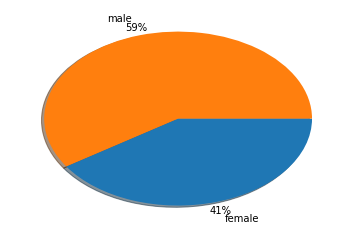

In [13]:
# Convert tenure to int64 type from float
fb_dataset['tenure'] = fb_dataset['tenure'].astype('int64')
# Convert gender column Object type to Category column type 
fb_dataset['gender'] = fb_dataset['gender'].astype('category')
# Find genderwise user count %
temp = fb_dataset.groupby('gender').count()
plt.pie(temp['age'], labels=['female', 'male'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, counterclock=False, shadow=True)

In [14]:
# It shows now tenure converted to int64 type and 2 null values imputed. 
# Gender column converted to Category type for future graphical interpretation. 
# Gender column contains 175 rows missing data i.e. 0.1%, which we are not replacing or dropping here. 
fb_dataset.info()

fb_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 15 columns):
age                      99003 non-null int64
DateOfBirth              99003 non-null datetime64[ns]
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null category
tenure                   99003 non-null int64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: category(1), datetime64[ns](1), int64(13)
memory usage: 11.4 MB


,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,14.530408,1975.719776,6.283365,537.900377,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,9.015606,22.589748,3.529672,457.655229,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


### Date Of birth Analysis
##### We have converted Date Of birth into small age group of 10 to cover entire age population. 
###### Using the age groups bins we will perform analysis on user count, genderwise user count, tenure, Friend_count etc.

In [49]:
# The following analysis we are doing against Date Of birth and Gender
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100','101-110','111-120']
fb_dataset['age_group'] = pd.cut(fb_dataset.age, [10,20,30,40,50,60,70,80,90,100,110,120], right=True, labels=labels)
fb_dataset['age_group'] = fb_dataset['age_group'].astype('category')
lens = fb_dataset.copy()

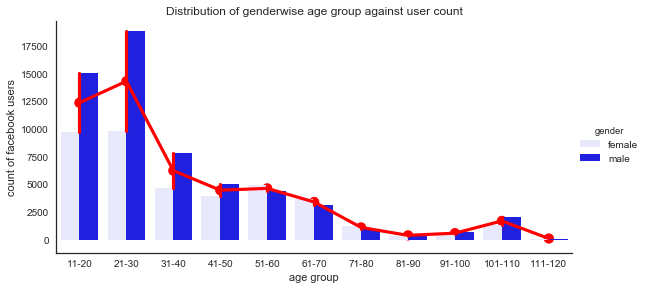

In [50]:
sns.set()
groupByAgeGroupAndGender = lens.groupby(['age_group','gender']).size().reset_index(name='counts')
with sns.axes_style('white'):
    g = sns.factorplot("age_group", data=lens, aspect=2,
                       kind="count", hue="gender", color='blue') 
    sns.pointplot(x='age_group', y='counts', data=groupByAgeGroupAndGender, color='r')

plt.title("Distribution of genderwise age group against user count")
plt.ylabel('count of facebook users')
plt.xlabel('age group');
plt.show()

#### It shows between age of 11 to 30 years users are using facebook twice more than 31 ownwards age group
#### It shows after age of 31 years many people are not using facebook as networking media. But age of 101 to 110 users are using more compare to other age group between 81-to-100. May be user has provided default date 1900 year while setting up the facebook profile so that age can be unknown/ignored.
#### Facebook used by Male is higher than Female user between 11 to 50 year age but after 51 age ownards female usage is gradually  increased in comparison to male population.


In [51]:
lens = lens.reset_index()

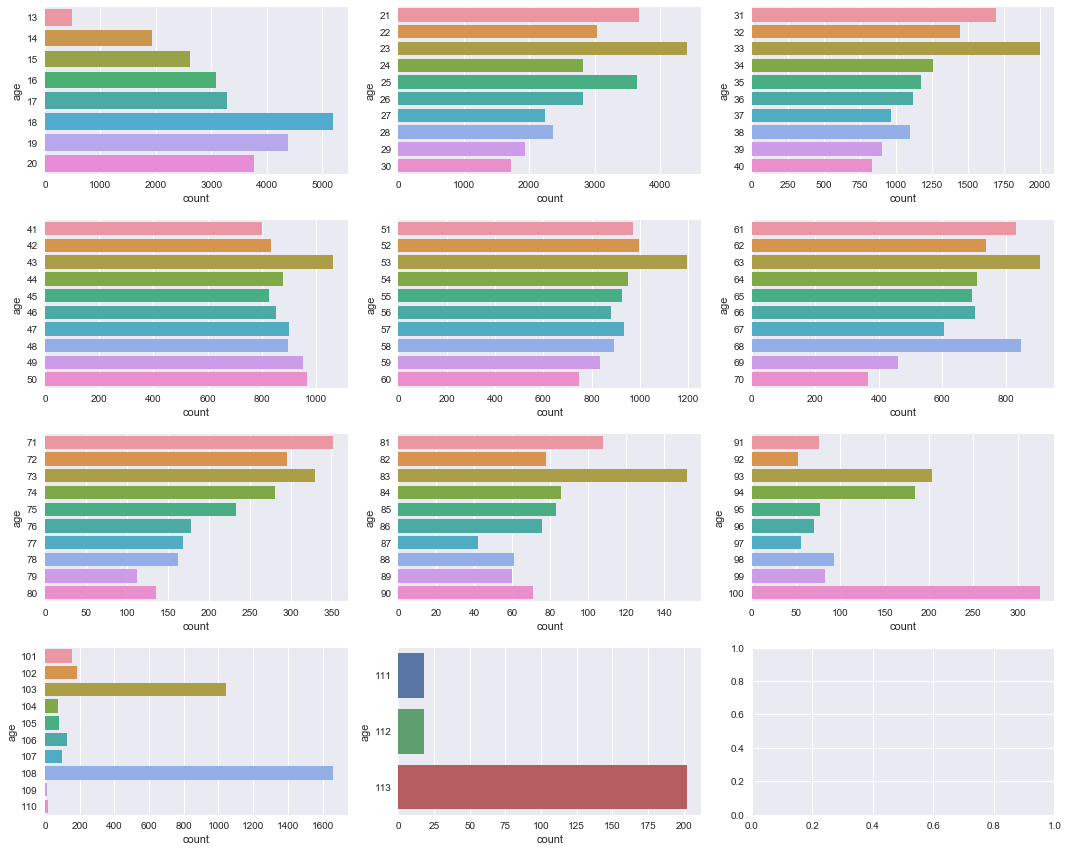

In [52]:
var = 'age'
fig, axes =plt.subplots(4,3, figsize=(15,12))
axes = axes.flatten()
for ax, i in zip(axes,labels):
    sns.countplot(y = var, data = lens[lens["age_group"] == i] ,ax=ax)
plt.tight_layout()  
plt.show()

##### From above graph it shows every 3rd and some age-group 8th year user count is higher compare to other years. Either users are providing incorrect detail by not specifying their year.

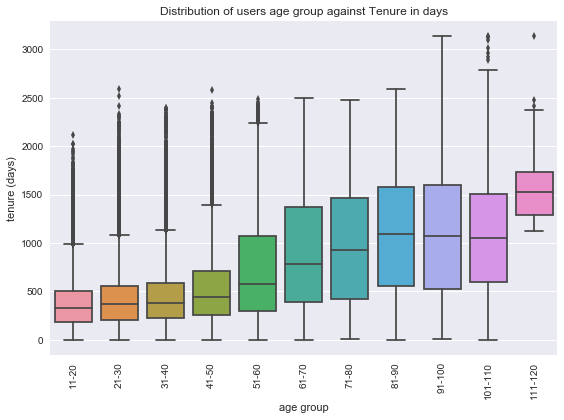

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(x="age_group", y="tenure", data=lens);
#for ax in g.axes.flat: 
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of users age group against Tenure in days")
plt.xlabel('age group');
plt.ylabel('tenure (days)');
plt.tight_layout()
plt.show()

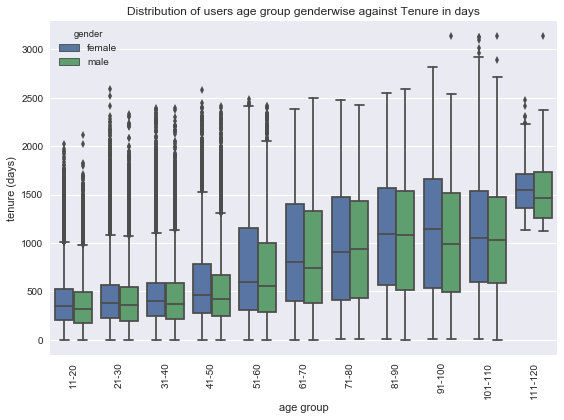

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="age_group", y="tenure", hue="gender", data=lens);
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of users age group genderwise against Tenure in days")
plt.xlabel('age group');
plt.ylabel('tenure (days)');
plt.tight_layout()
plt.show()

##### The above tenure graph shows Facebook founded on 4th Feb 2004 since then user are using it hence max days are between 2005 to 2013 which is almost 8 to 9 years ago. Also from age and date of birth we can confirm that dataset created around 2013. 
##### It shows age group 90-99, 10 year ago started using Facebook for socialising. Even it suprising to see age group 20-29 where using Facebook almost 6-7 years ago i.e. 2006-2007.
##### Even though female user count is 40% but still Female tenure is higher compare to male across all age group

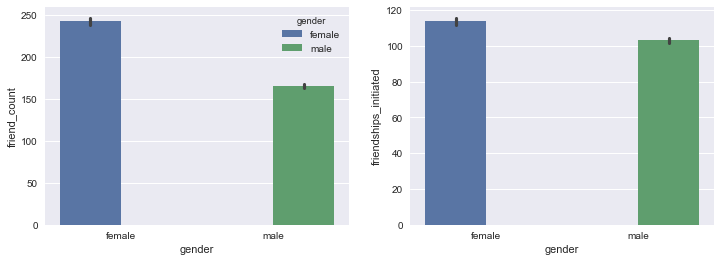

In [57]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
g = sns.barplot(x='gender', y='friend_count', hue='gender', data=lens, ax=ax1);
g = sns.barplot(x='gender', y='friendships_initiated', hue='gender', data=lens, ax=ax2);
ax2.legend("")
plt.close(2)
plt.close(3)

##### Female age group 11 to 60 are having friends and friend request more than male. Also overall Female friends and request friend count is more than male across the population.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


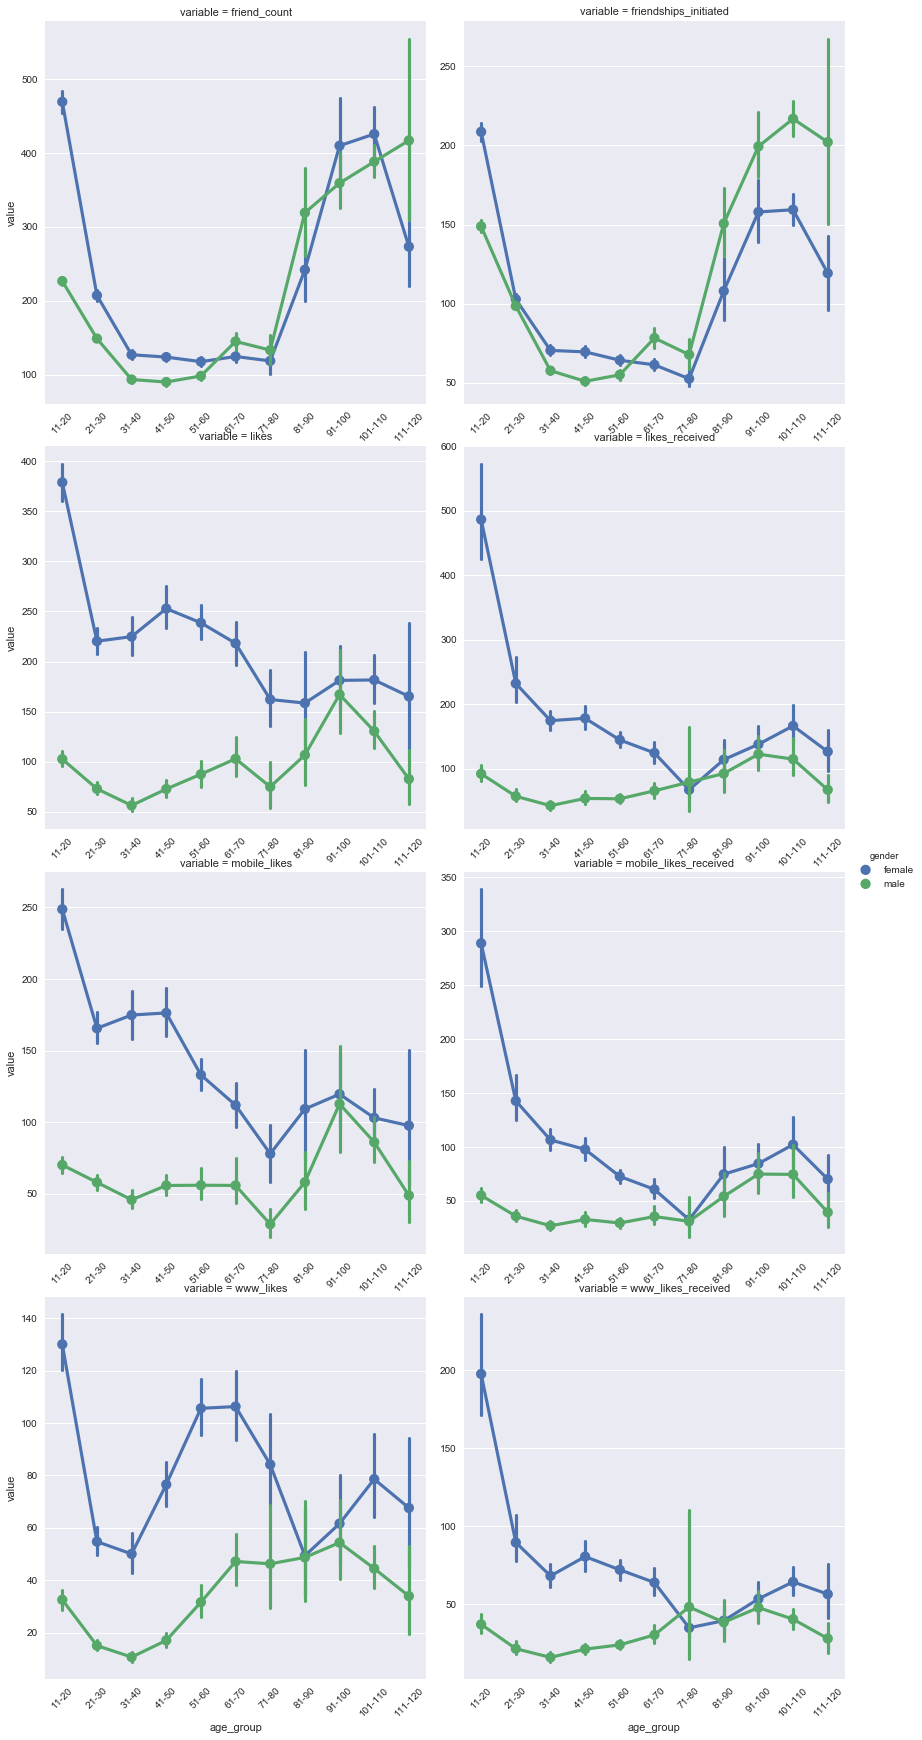

In [58]:
def boxplot(x, y, **kwargs):
    sns.pointplot(x=x, y=y)
    x=plt.xticks(rotation=90)

lens.reset_index()
f = pd.melt(lens, id_vars=['age_group','gender'], value_vars=['friend_count','friendships_initiated',\
                                                              'likes', 'likes_received', \
                                                              'mobile_likes', 'mobile_likes_received',\
                                                              'www_likes','www_likes_received'])
pal = dict(male="seagreen", female="gray")
g = sns.FacetGrid(f, col="variable", hue='gender',palette=pal, col_wrap=2, sharex=False, sharey=False,size=6)
g = g.map(sns.pointplot, "age_group", "value",'gender', palette='deep',hue_order=["female","male"])
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()


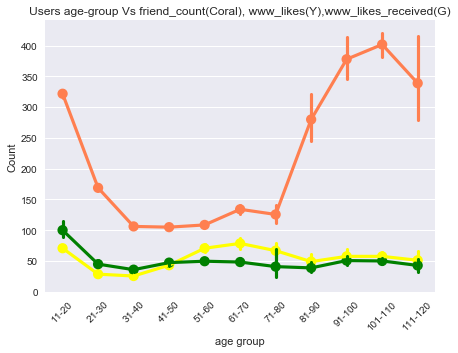

In [62]:
fig, ax = plt.subplots(figsize=(7,5))
with sns.axes_style('white'):
    g = sns.pointplot(x='age_group', y='friend_count', data=lens,color='coral');
    g = sns.pointplot(x='age_group', y='www_likes', data=lens,color='yellow');
    g = sns.pointplot(x='age_group', y='www_likes_received', data=lens,color='green');
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Users age-group Vs friend_count(Coral), www_likes(Y),www_likes_received(G)")
plt.xlabel('age group')
plt.ylabel('Count')
#plt.legend()
plt.show()

#### Friend Count Analysis
###### Already completed  (Age group  – tenure, Age group  – tenure & Gender)

We have converted Friend_count column into 400 friend count group as data varies from (0 to 5200 friend_count).

In [64]:
labels = ['0-400', '401-800', '800-1200', '1201-1600', '1601-2000', '2001-2400', '2401-2800','2801-3200','3201-3600','3601-4000','4001-4400', '4401-4800','4801-5200']
lens['friend_count_group'] = pd.cut(lens.friend_count, [-1,400,800,1200,1600,2000,2400,2800,3200,3600,4000,4400,4800,5200], right=True, labels=labels)
print("Distinct Day values: {}".format(lens["friend_count_group"].unique()))

Distinct Day values: [0-400, 401-800, 800-1200, 1201-1600, 1601-2000, ..., 4001-4400, 2401-2800, 4801-5200, 4401-4800, 3201-3600]
Length: 13
Categories (13, object): [0-400 < 401-800 < 800-1200 < 1201-1600 ... 3601-4000 < 4001-4400 < 4401-4800 < 4801-5200]


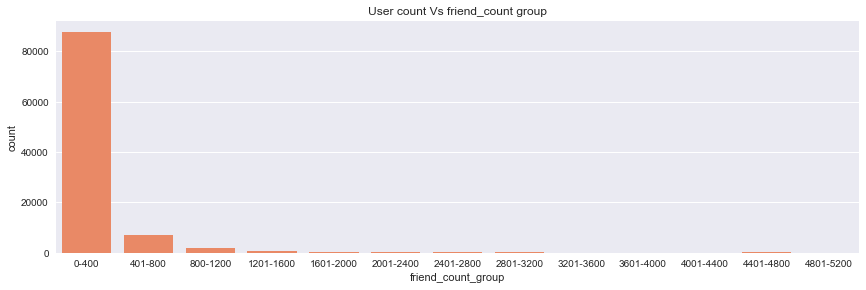

In [69]:
fig, ax = plt.subplots(figsize=(7,5))
sns.factorplot("friend_count_group", data=lens, aspect=3, kind="count", color='coral')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("User count Vs friend_count group")
plt.close(1)

In [26]:
# To make sure all the data is covered in Friend_count_group and no missing or null values for friend_count_group column.
lens.groupby('friend_count_group').count()

,userid,age,DateOfBirth,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
friend_count_group,,,,,,,,,,,,,,,,,
0-400,87802,87802,87802,87802,87802,87802,87652,87802,87802,87802,87802,87802,87802,87802,87802,87802,87802
401-800,6977,6977,6977,6977,6977,6977,6957,6977,6977,6977,6977,6977,6977,6977,6977,6977,6977
800-1200,2049,2049,2049,2049,2049,2049,2046,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049
1201-1600,821,821,821,821,821,821,821,821,821,821,821,821,821,821,821,821,821
1601-2000,440,440,440,440,440,440,439,440,440,440,440,440,440,440,440,440,440
2001-2400,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243
2401-2800,160,160,160,160,160,160,159,160,160,160,160,160,160,160,160,160,160
2801-3200,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
3201-3600,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91


In [70]:
# created sub group of Friend_count between 0 to 2600 as it covers 99% of User population.
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400','1401-1600','1601-1800','1801-2000','2001-2200', '2201-2400','2401-2600']
lens['friend_count_subgroup'] = pd.cut(lens.friend_count, [-1,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600], right=True, labels=labels)

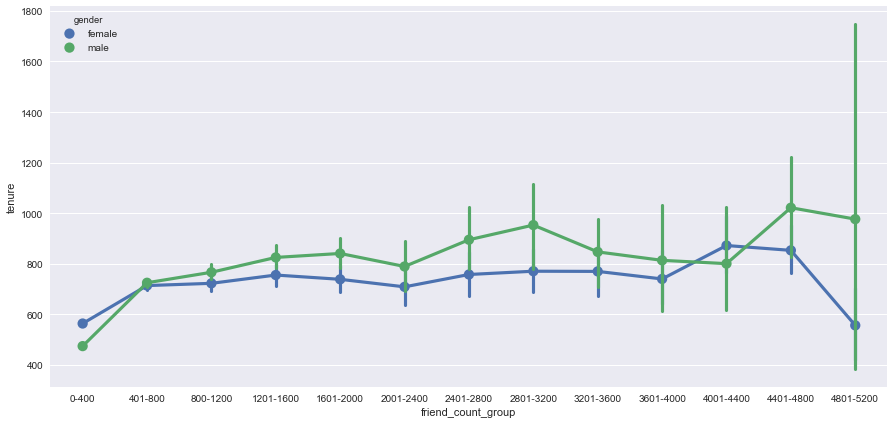

In [71]:
fig, ax = plt.subplots(figsize=(15,7))
with sns.axes_style('white'):
    sns.pointplot(x='friend_count_group', y='tenure', hue='gender', data=lens);

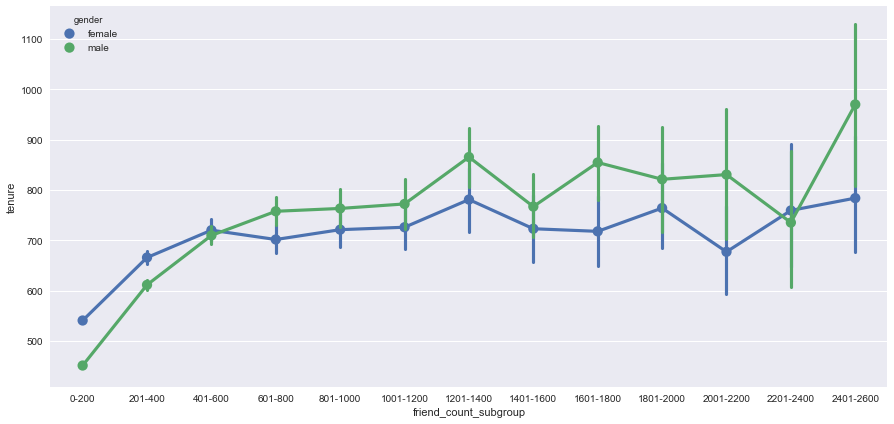

In [72]:
fig, ax = plt.subplots(figsize=(15,7))
with sns.axes_style('white'):
    sns.pointplot(x='friend_count_subgroup', y='tenure', hue='gender', data=lens);

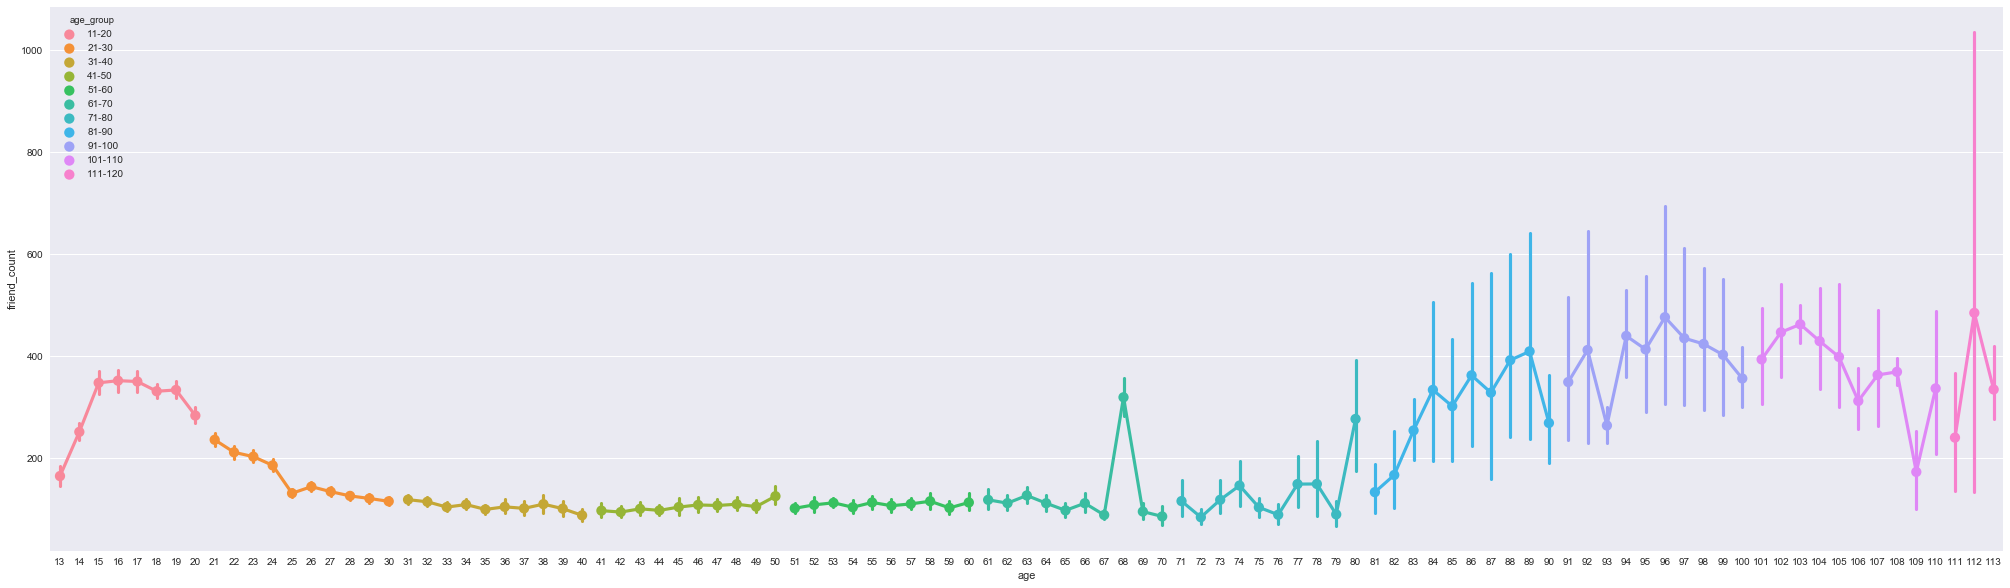

In [73]:
fig, ax = plt.subplots(figsize=(35,10))
with sns.axes_style('white'):
    sns.pointplot(y='friend_count', x='age',hue='age_group', data=lens); 

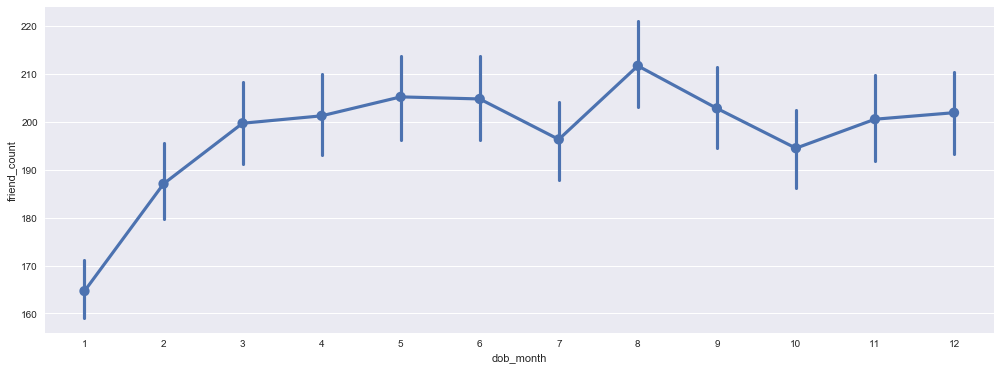

In [31]:
fig, ax = plt.subplots(figsize=(17,6))
with sns.axes_style('white'):
    sns.pointplot(y='friend_count', x='dob_month', data=lens); 

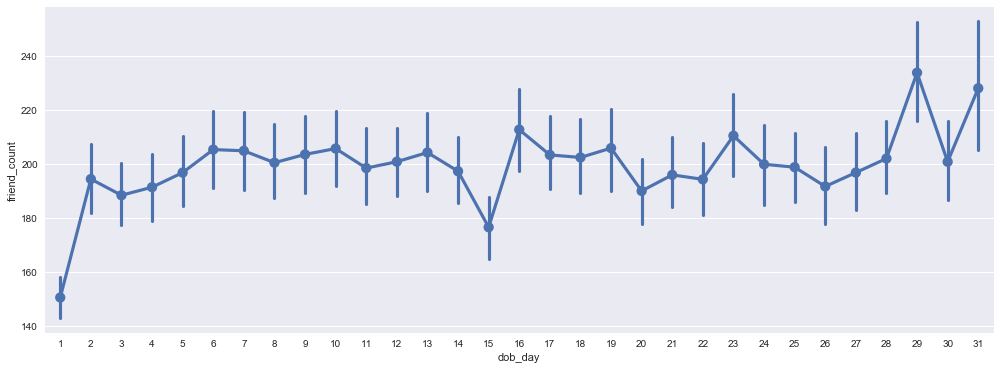

In [32]:
fig, ax = plt.subplots(figsize=(17,6))
with sns.axes_style('white'):
    sns.pointplot(y='friend_count', x='dob_day', data=lens); 

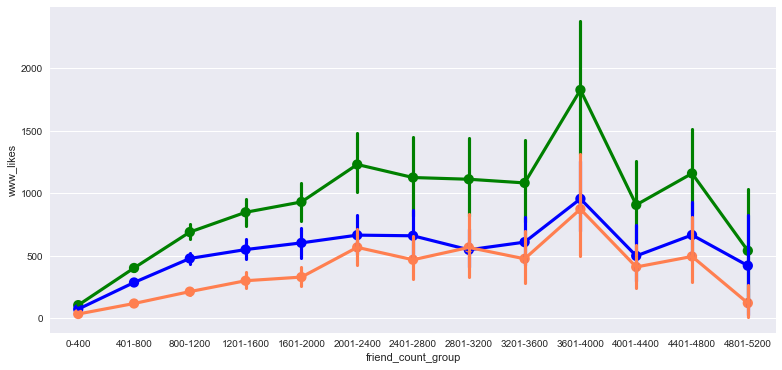

In [33]:
fig, ax = plt.subplots(figsize=(13,6))
sns.pointplot(x='friend_count_group', y='likes', labels="likes", data=lens,color='green',legend=True); 
sns.pointplot(x='friend_count_group', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
sns.pointplot(x='friend_count_group', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);

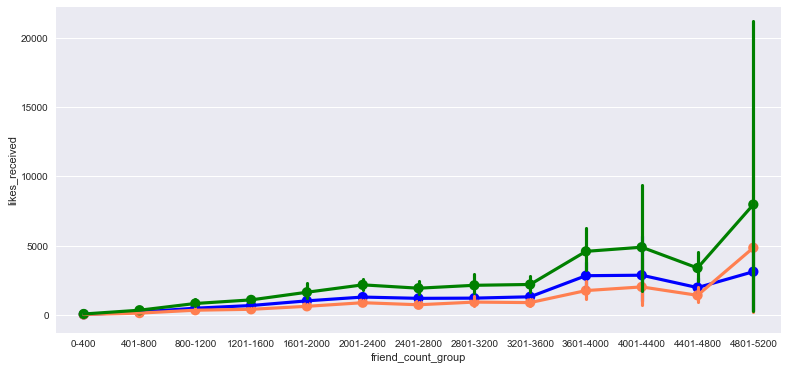

In [34]:
fig, ax = plt.subplots(figsize=(13,6))
sns.pointplot(x='friend_count_group', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='friend_count_group', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='friend_count_group', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);

Text(0.5,1,'Friend count subgroup Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

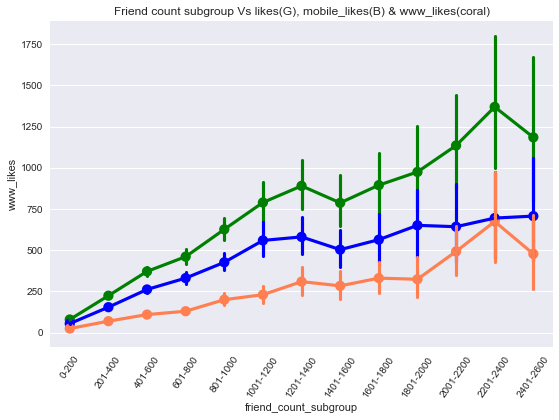

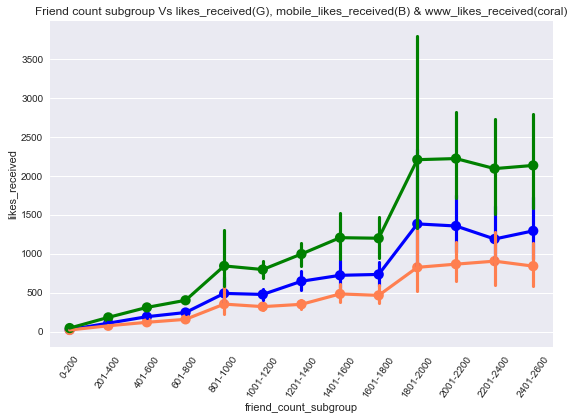

In [165]:
fig, ax = plt.subplots(figsize=(9,6))
#with sns.axes_style('white'):
sns.pointplot(x='friend_count_subgroup', y='likes', labels="likes", data=lens,color='green',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);
for tick in ax.get_xticklabels():
            tick.set_rotation(55)
plt.title('Friend count subgroup Vs likes(G), mobile_likes(B) & www_likes(coral)')
fig, ax = plt.subplots(figsize=(9,6))
#with sns.axes_style('white'):
sns.pointplot(x='friend_count_subgroup', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='friend_count_subgroup', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);
for tick in ax.get_xticklabels():
            tick.set_rotation(55)
plt.title('Friend count subgroup Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

#### Tenure Analysis
###### Already completed  (Age group  – tenure, Age group  – tenure & Gender, Friend_count group – tenure, Friend_count subgroup – tenure)

In [145]:
labels = ['1', '2', '3', '4','5', '6','7','8','9']
lens['tenure_group'] = pd.cut(lens.tenure, [-1,365,730,1095,1460,1825,2190,2555,2920,3285], right=True, labels=labels)
print("Tenure group distinct values: {}".format(lens["tenure_group"].unique()))

Tenure group distinct values: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Categories (9, object): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]


In [164]:
lens.groupby("tenure_group").count()['userid']

tenure_group
1    43658
2    33366
3     9861
4     5449
5     4557
6     1507
7      581
8       15
9        9
Name: userid, dtype: int64

In [157]:
tenurePercentageChange = lens.groupby("tenure_group").count()['userid']
tenurePercentageChange[::-1].pct_change()

tenure_group
9          NaN
8     0.666667
7    37.733333
6     1.593804
5     2.023889
4     0.195743
3     0.809690
2     2.383632
1     0.308458
Name: userid, dtype: float64

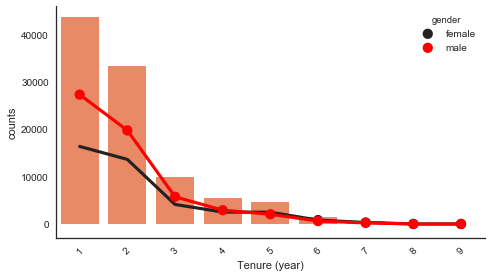

In [166]:
fig, ax = plt.subplots(figsize=(8,5))
groupBytenure = lens.groupby(['tenure_group',"gender"]).size().reset_index(name='counts')
with sns.axes_style('white'):
    g = sns.factorplot("tenure_group", data=lens, aspect=1.7,
                       kind="count", color='coral') 
    sns.pointplot(x='tenure_group', y='counts',hue="gender", data=groupBytenure, color='r')
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.xlabel('Tenure (year)')
plt.close(1)

Text(0.5,1,'Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(coral)')

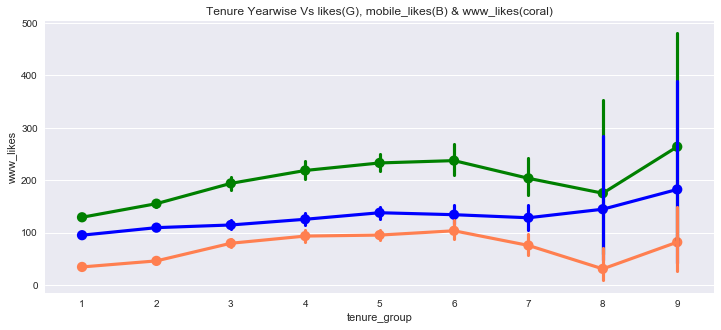

In [161]:
fig, ax = plt.subplots(figsize=(12,5))
#with sns.axes_style('white'):
g = sns.pointplot(x='tenure_group', y='likes', labels="likes", data=lens,color='green',legend=True); 
g = sns.pointplot(x='tenure_group', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
g = sns.pointplot(x='tenure_group', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);
plt.title('Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(coral)')

Text(0.5,1,'Tenure Yearwise Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

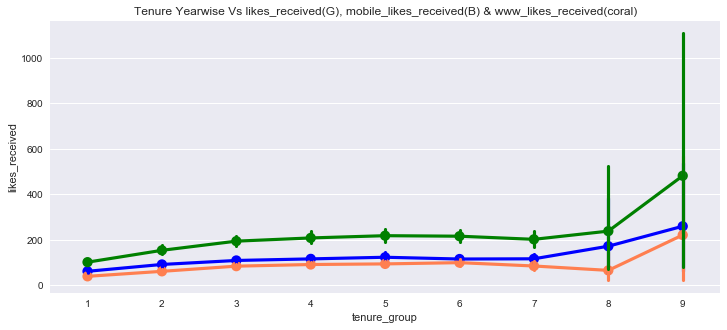

In [162]:
fig, ax = plt.subplots(figsize=(12,5))
#with sns.axes_style('white'):
sns.pointplot(x='tenure_group', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='tenure_group', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='tenure_group', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);
plt.title('Tenure Yearwise Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

In [94]:
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700','701-800','801-900','901-1000','1001-1100', '1101-1200','1201-1300','1301-1400','1401-1500','1501-1600','1601-1700','1701-1800','1801-1900','1901-2000', '2001-3200']
lens['tenure_subgroup'] = pd.cut(lens.tenure, [-1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,3200], right=True, labels=labels)
print("Tenure subgroup distinct values: {}".format(lens["tenure_subgroup"].unique()))

Tenure subgroup distinct values: [201-300, 0-100, 101-200, 501-600, 401-500, ..., 1301-1400, 1501-1600, 1801-1900, 1701-1800, 2001-3200]
Length: 21
Categories (21, object): [0-100 < 101-200 < 201-300 < 301-400 ... 1701-1800 < 1801-1900 < 1901-2000 < 2001-3200]


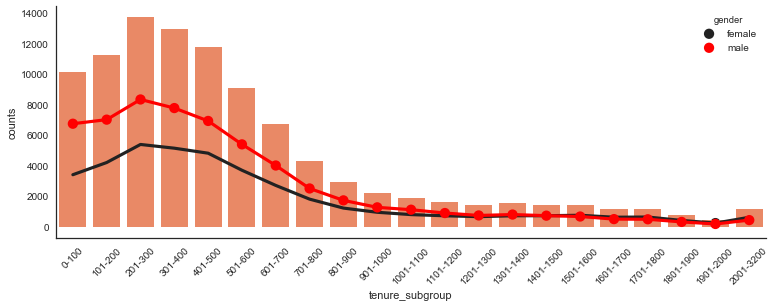

In [98]:
subgroupBytenure = lens.groupby(['tenure_subgroup',"gender"]).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12,5))
with sns.axes_style('white'):
    g = sns.factorplot("tenure_subgroup", data=lens, aspect=2.7,
                       kind="count", color='coral') 
    sns.pointplot(x='tenure_subgroup', y='counts',hue="gender", data=subgroupBytenure, color='r')
for tick in g.ax.get_xticklabels():
    tick.set_rotation(45)
plt.close(1)

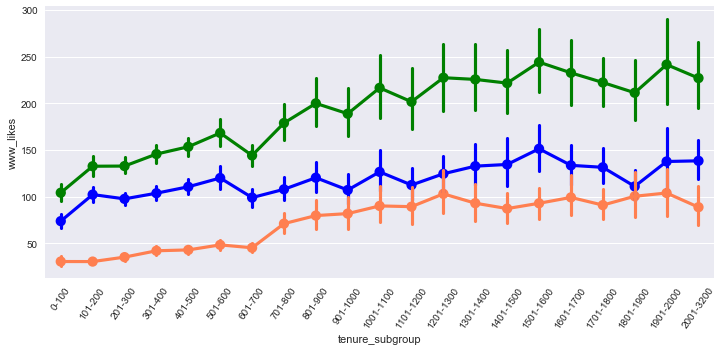

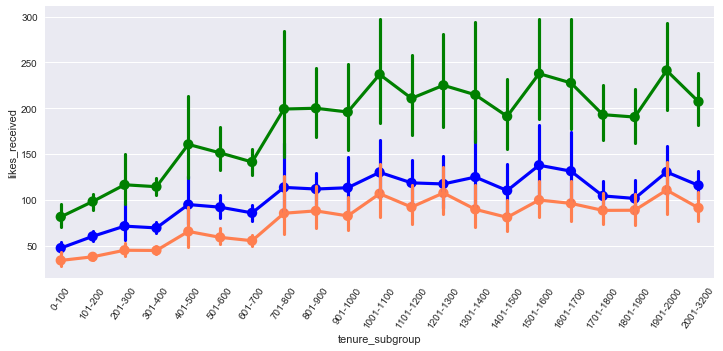

In [100]:
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='tenure_subgroup', y='likes', labels="likes", data=lens,color='green',legend=True); 
sns.pointplot(x='tenure_subgroup', y='mobile_likes', data=lens,color='blue',lable='mobile_likes',legend=True); 
sns.pointplot(x='tenure_subgroup', y='www_likes', data=lens,color='coral',lable='www_likes',legend=True);
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='tenure_subgroup', y='mobile_likes_received', data=lens,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='tenure_subgroup', y='www_likes_received', data=lens,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='tenure_subgroup', y='likes_received', labels="likes_received", data=lens,color='green',legend=True);
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

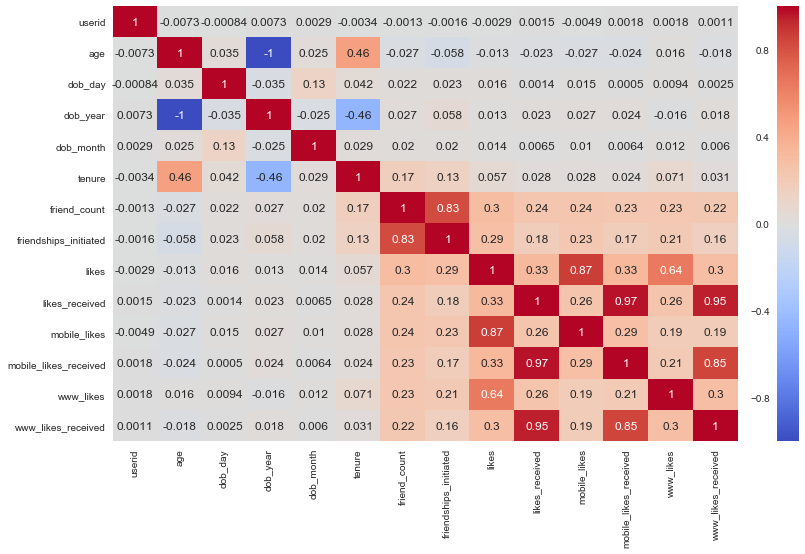

In [106]:
# Compute the correlation matrix
corr_df = lens.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 8))

# Draw a violinplot with a narrower bandwidth than the default
sns.heatmap(data=corr_df, annot = True, cmap='coolwarm')

sns.despine(left=True, bottom=True)

Heatmap for all columns, it is observed that there are two red colored squares that get my attention.

Varaible combination : 'likes' & 'mobile_likes', 'likes' & 'www_likes', 'likes_received' & 'mobile_likes_received', 'likes_received' & 'www_likes_received', 'www_likes_received' & 'mobile_likes_received', ('tenure', 'age' & 'dob_year') and 'friend_count' & 'friendships_initiated'. 

These combination shows how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

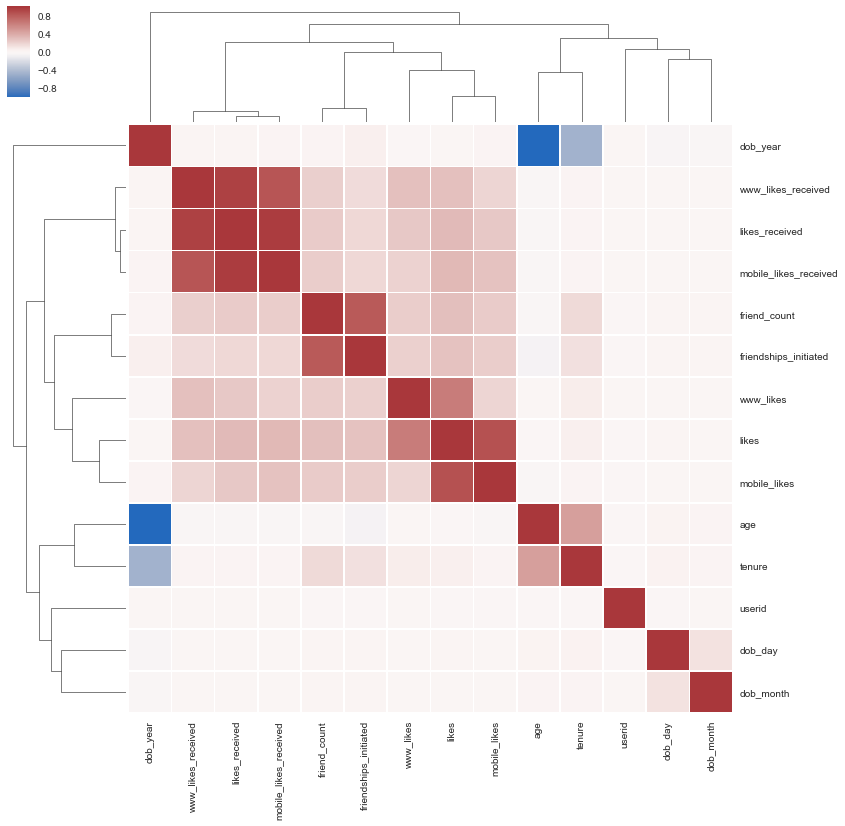

In [107]:
sns.clustermap(corr_df, center=0, cmap="vlag",linewidths=.75, figsize=(13, 13))

In [108]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, userid to www_likes_received
Data columns (total 14 columns):
userid                   14 non-null float64
age                      14 non-null float64
dob_day                  14 non-null float64
dob_year                 14 non-null float64
dob_month                14 non-null float64
tenure                   14 non-null float64
friend_count             14 non-null float64
friendships_initiated    14 non-null float64
likes                    14 non-null float64
likes_received           14 non-null float64
mobile_likes             14 non-null float64
mobile_likes_received    14 non-null float64
www_likes                14 non-null float64
www_likes_received       14 non-null float64
dtypes: float64(14)
memory usage: 1.6+ KB


Index(['age', 'tenure', 'dob_day', 'dob_month', 'www_likes', 'likes',
       'likes_received', 'mobile_likes', 'friend_count',
       'friendships_initiated'],
      dtype='object')


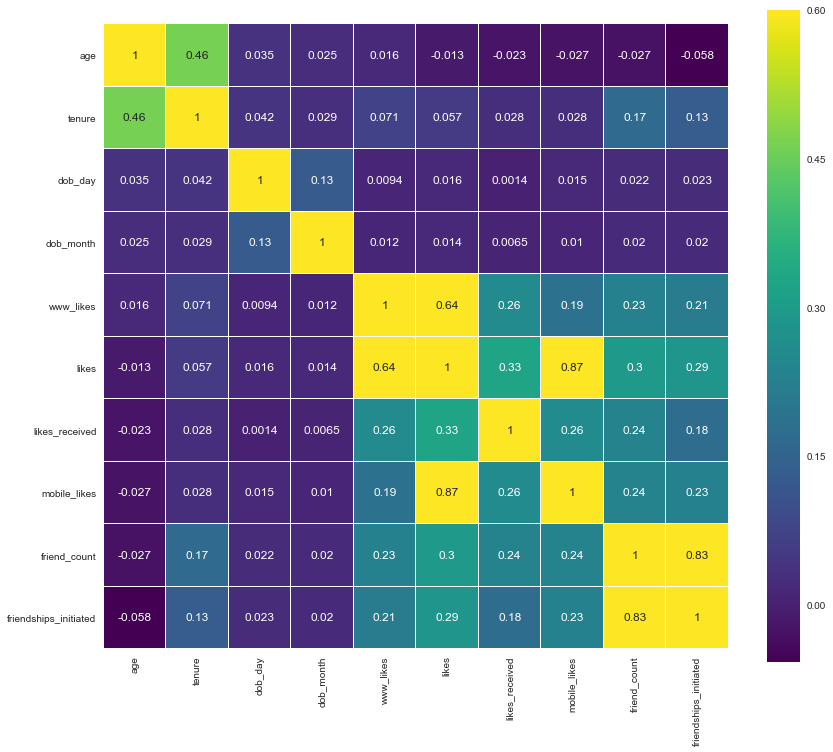

In [110]:
k= 14
cols = corr.nlargest(k,'age')['age'].index
print(cols)
cm = np.corrcoef(lens[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.6, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

###### From Heatmap, zoomed heatmap and clustermap we can exclude high correlated columns to perform model analysis. 

Observations :

Initial glance it is observed that there are two & three red colored squares that get my attention which is 'likes' & 'mobile_likes', 'likes' & 'www_likes', 'likes_received' & 'mobile_likes_received', 'likes_received' & 'www_likes_received', 'www_likes_received' & 'mobile_likes_received', ('tenure', 'age' & 'dob_year') and 'friend_count' & 'friendships_initiated'

'likes' & 'mobile_likes' and 'likes' & 'www_likes' are also closely correlated so one of them we can keep for futher analysis and other 2 features can be dropped 'mobile_likes' and 'www_likes'.

'likes' is strongly correlated with 'mobile_likes' and 'www_likes' as sum of www_likes and mobile_likes is 'likes' column. Similarly 'likes_received' is strongly correlated with 'mobile_likes_received' and 'www_likes_received' as sum of www_likes_received and mobile_likes_received is 'likes' column.

'friend_count' & 'friendship_initiated' are closely correlated hence 'friendship_initiated' column is excluded.
'dob_year' is negatively correlated with 'age' and 'tenure' also 'age' & 'tenure' strongly correlated. 
'dob_month' and 'dob_day' are not depend on other features hence we are excluding 'dob_year', 'dob_month' and 'dob_day'.

##### Redrawing Diverging heatmap and Cluster plot with selected features

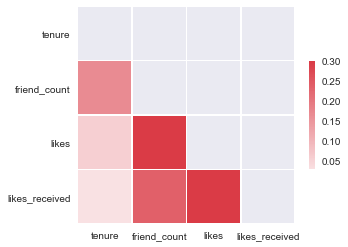

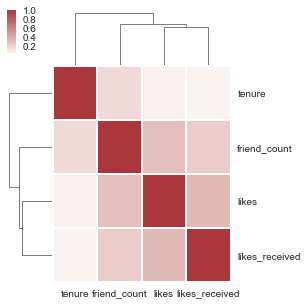

In [125]:
df = lens[['age','tenure', 'friend_count','likes','likes_received','gender']]
df.set_index('age', inplace=True)
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g= sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.clustermap(corr, center=0, cmap="vlag",linewidths=.75, figsize=(4, 5))

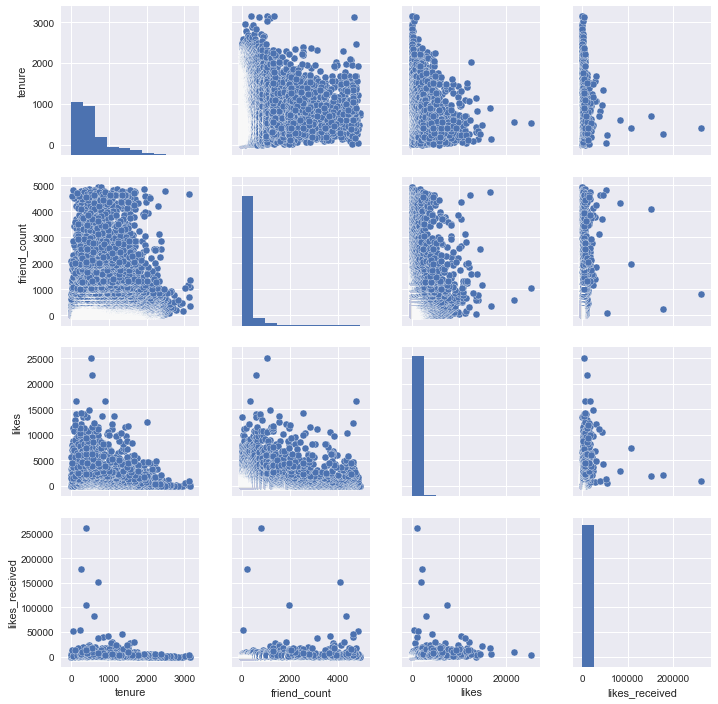

In [126]:
sns.pairplot(df)

#### From above Pariplot we can see straight line getting formed hence drawing Scatter plots between the most correlated variables
The following features we have excluded from model selection but still like to draw scatter regression line.
- 'likes' & 'mobile_likes', 'likes' & 'www_likes', 
- 'likes_received' & 'mobile_likes_received' Combination is graph created others are not created as it will be similar for 'likes_received' & 'www_likes_received', 'www_likes_received' & 'mobile_likes_received', 
- 'friend_count' & 'friendships_initiated'

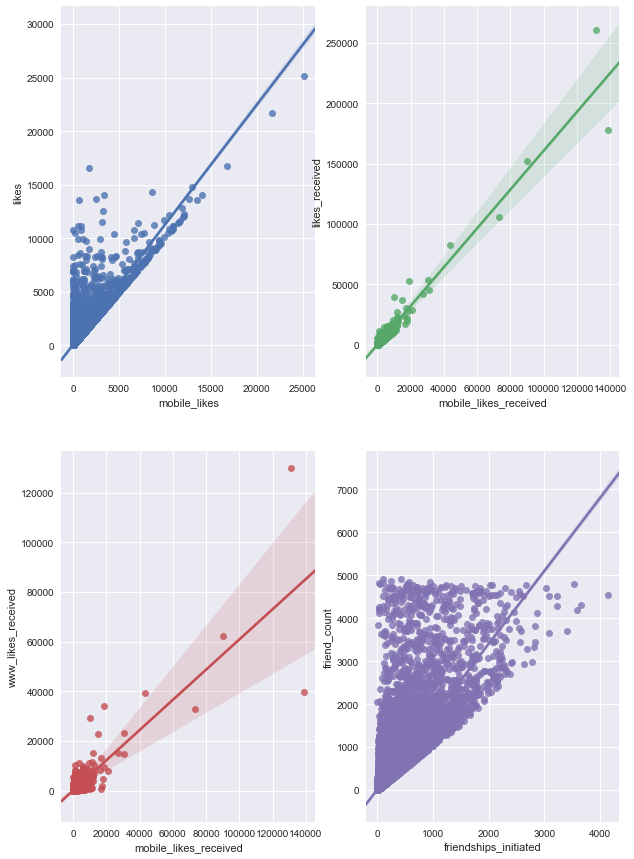

In [132]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,15))
scatter_plot = pd.concat([lens['likes'],lens['mobile_likes']],axis = 1)
sns.regplot(x='mobile_likes',y = 'likes',data = scatter_plot,scatter= True, fit_reg=True, ax=ax1)

scatter_plot = pd.concat([lens['likes_received'],lens['mobile_likes_received']],axis = 1)
sns.regplot(x='mobile_likes_received',y = 'likes_received',data = scatter_plot,scatter= True, fit_reg=True, ax=ax2)

scatter_plot = pd.concat([lens['www_likes_received'],lens['mobile_likes_received']],axis = 1)
sns.regplot(x='mobile_likes_received',y = 'www_likes_received',data = scatter_plot,scatter= True, fit_reg=True, ax=ax3)

#scatter_plot = pd.concat([lens['tenure'],lens['dob_year']],axis = 1)
#sns.regplot(x='dob_year',y = 'tenure',data = scatter_plot,scatter= True, fit_reg=True, ax=ax4)

scatter_plot = pd.concat([lens['friend_count'],lens['friendships_initiated']],axis = 1)
sns.regplot(x='friendships_initiated',y = 'friend_count',data = scatter_plot,scatter= True, fit_reg=True, ax=ax4)

##### From above Pariplot we can see straight line getting formed between 'likes_received' and 'likes', 'friend_count' & 'tenure' hence drawing scatter regression line. 
From those figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line.

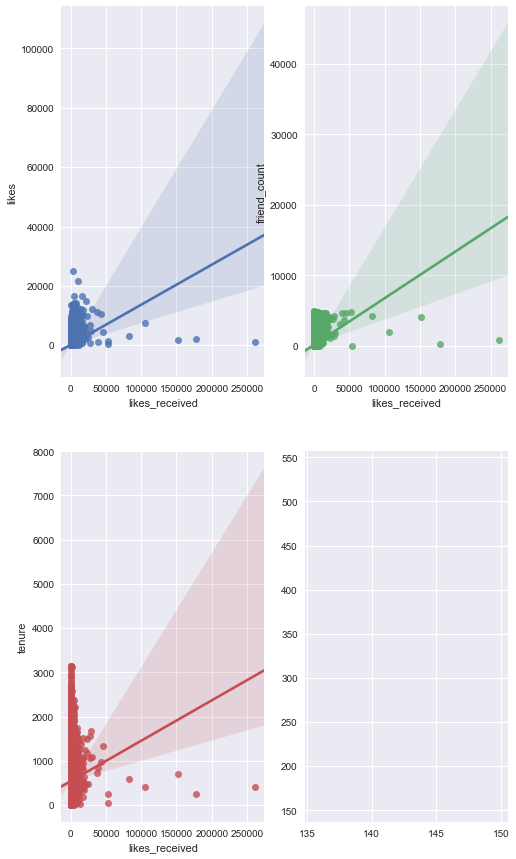

In [134]:
fig, ((ax6,ax7),(ax8,ax9)) = plt.subplots(nrows=2, ncols=2, figsize=(8,15))

scatter_plot = pd.concat([lens['likes'],lens['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'likes',data = scatter_plot,scatter= True, fit_reg=True, ax=ax6)

scatter_plot = pd.concat([lens['friend_count'],lens['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'friend_count',data = scatter_plot,scatter= True, fit_reg=True, ax=ax7)

scatter_plot = pd.concat([lens['tenure'],lens['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'tenure',data = scatter_plot,scatter= True, fit_reg=True, ax=ax8)